In [2]:
L2SP = False

zoomUniform = True


torch.Size([5000, 5000])
trace =  tensor(882.8914)
traces= [ 0.94594714 12.39469438 23.47392123 63.18543725]
tensor(0.0002) tensor(0.0571)


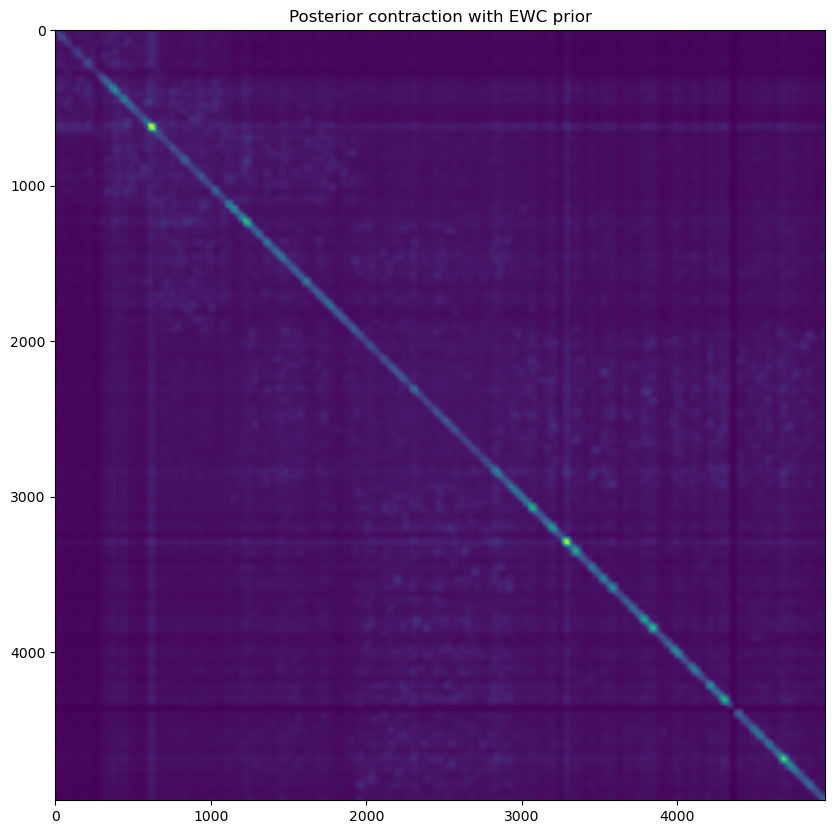

In [3]:
import matplotlib.pyplot as plt

import sys
sys.path.append("/idiap/temp/vpocard/ImageNetTF/More_classes/")
sys.path.append("/idiap/temp/vpocard/ImageNetTF/More_classes/priors")
import hessian
import torch
import os
from torch import nn
from numpy.random import choice
import gaussian_filter
import architecture
import numpy as np
if L2SP : hessianApprox = torch.load(f"/idiap/temp/vpocard/ImageNetTF/More_classes/ResultArch5/model_saves/L2SP/3.0_penal_hessian_run_{0}","cpu")
else : hessianApprox = torch.load(f"/idiap/temp/vpocard/ImageNetTF/More_classes/ResultArch5/model_saves/EWC/8.0_penal_hessian_run_{0}2","cpu")
penalty = torch.load("/idiap/temp/vpocard/ImageNetTF/More_classes/SS-learning/Hessian/EWC")
# print(hessianApprox.eigen)
import math
device  ="cpu"
diag = penalty.SubHessianList[0][0].diag.to(device)
model = architecture.ResMaxConvNeuralNetwork5()
count = 0
counts = []
for i in range(4):
    layer = model.__getattr__(f"conv_stack{i+1}")

    for p in layer.parameters():
        count += p.numel()

    counts.append(count)
numEigen = 1000
W = hessianApprox.W[:numEigen].to(device)
size = 5000# W.shape[1]
if  zoomUniform:
    index = choice(W.shape[1],size,replace=False)
else:
    index = []
    counts.insert(0,0)
    print(counts)
    for i in range(4):
        choixPossible = np.array(range(counts[i],counts[i+1]))
        # print(choixPossible)
        choix = choice(choixPossible,int(size/4)  ).tolist()
        index += choix
        # print(choix)

index = np.array(index)
index.sort()
W = W[:,index]
diag = diag[index]

eigen = hessianApprox.eigen[:numEigen].to(device)
if L2SP : eigen = eigen/(eigen + 1e3/(500*50))
else    : eigen = eigen/(eigen + 1e8/(500*50)) 
eigen = eigen.sqrt()

W = W/W.norm(dim=1).view(-1,1)
# if not L2SP:
#     W = W*(diag[None,...].sqrt()+1e-3)
# W = W/W.norm(dim=1).view(-1,1)

# if not L2SP:
#     W = W/(diag.sqrt()+1e-3)

W = W*eigen[...,None]



conv = gaussian_filter.create_filter(1,50,100)
hessian = torch.mm(W.T,W)

print(hessian.shape)

# if L2SP:
#     for i in range(hessian.shape[0]):
#         # hessian[i,i] += 1e3/25000
#         hessian[i,i] = hessian[i,i]/(hessian[i,i]+1e3/25000)
# else :
#     for i in range(hessian.shape[0]):
#         # hessian[i,i] +=  diag[i]#1e3/25000
#         hessian[i,i] =   hessian[i,i]/( diag[i]+hessian[i,i]+1e-8)

print("trace = ",hessian.trace())



traces = []

for count in counts:
    indexExtract = index<count
    hessianExtract = hessian[indexExtract][:,indexExtract]
    traces.append(hessianExtract.trace().item())
traces = np.array(traces)
traces = traces/traces[-1]*100

for i in range(1,len(traces)):
    traces[-i] = traces[-i] - traces[-(i+1)]
print("traces=",traces)



# print(hessian.shape)
# print((1,)+hessian.shape)

hessian = hessian.abs() #-hessian.min()
hessian = conv(hessian.view( (1,)+hessian.shape   ))
hessian = hessian.view(hessian.shape[1:])
# hessian = hessian/hessian.max()
# hessian = hessian.pow(1/2)
# 
# *255
# hessian = hessian.pow(1/5)
print(hessian.min(),hessian.max())
hessian  =hessian.detach()

hessian = hessian.cpu().numpy()
plt.figure(figsize=(10,10))
if L2SP : title = "Posterior contraction with L2SP prior"
else    : title = "Posterior contraction with EWC prior"
plt.imshow(hessian)#,cmap="magma"
plt.title(title)
plt.show()

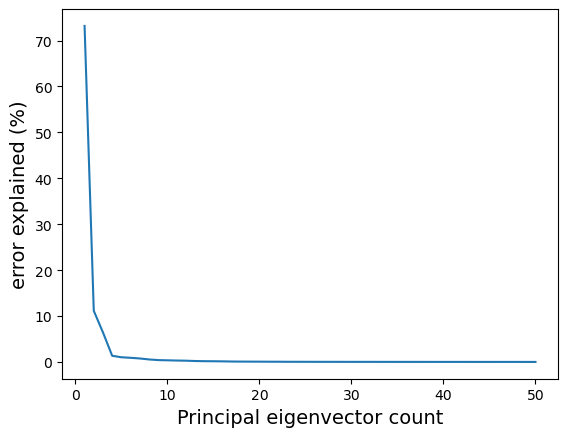

torch.Size([5000, 5000])
trace =  tensor(1000.0001)
traces= [ 8.65221657 26.72433461 31.29076042 33.3326884 ]
tensor(0.0005) tensor(0.0642)


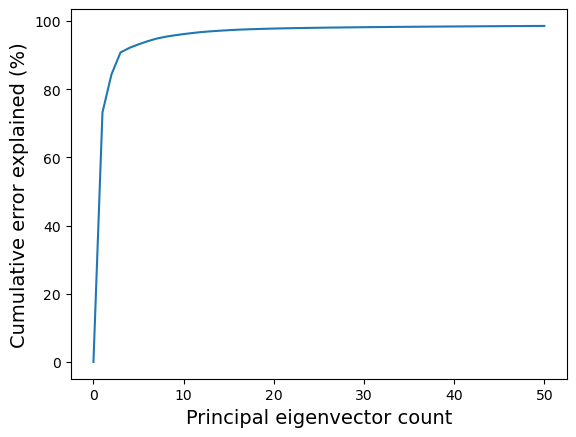

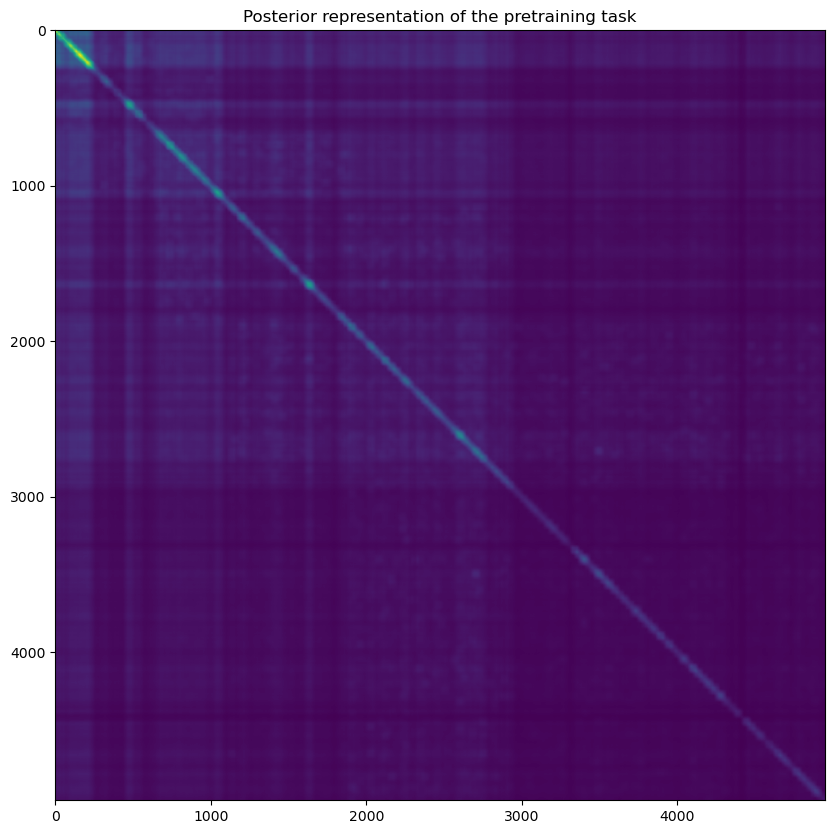

In [14]:
import matplotlib.pyplot as plt

import sys
sys.path.append("/idiap/temp/vpocard/ImageNetTF/More_classes/")
sys.path.append("/idiap/temp/vpocard/ImageNetTF/More_classes/priors")
import hessian
import torch
import os
from torch import nn
from numpy.random import choice
import gaussian_filter
import architecture
import numpy as np

hessianApprox = torch.load(f"/idiap/temp/vpocard/ImageNetTF/More_classes/SS-learning/Hessian/hessianCompiled2","cpu")
penalty = torch.load("/idiap/temp/vpocard/ImageNetTF/More_classes/SS-learning/Hessian/EWC")
# print(hessianApprox.eigen)
import math
hessianApprox = hessianApprox.SubHessianList[0][0]
device  ="cpu"
diag = penalty.SubHessianList[0][0].diag.to(device)
model = architecture.ResMaxConvNeuralNetwork5()
count = 0
counts = []
for i in range(4):
    layer = model.__getattr__(f"conv_stack{i+1}")

    for p in layer.parameters():
        count += p.numel()

    counts.append(count)
numEigen = 1000
W = hessianApprox.W[:numEigen].to(device)
size = 5000# W.shape[1]
if  zoomUniform:
    index = choice(W.shape[1],size,replace=False)
else:
    index = []
    counts.insert(0,0)
    print(counts)
    for i in range(4):
        choixPossible = np.array(range(counts[i],counts[i+1]))
        # print(choixPossible)
        choix = choice(choixPossible,int(size/4)  ).tolist()
        index += choix
        # print(choix)

index = np.array(index)
index.sort()
W = W[:,index]
diag = diag[index]

eigen = hessianApprox.eigen[:numEigen].to(device)
error = eigen/eigen.sum()
error = error[:50]
error.sort()
error = error.cpu()
# plt.tick_params(labelsize=14)
plt.plot(range(1,len(error)+1),error*100)
plt.ylabel("error explained (%)",fontsize=14)
plt.xlabel("Principal eigenvector count",fontsize=14)
plt.show()
error = torch.cat([ torch.zeros(1) , error])

plt.plot(range(len(error)),error.cumsum(dim=0)*100)
plt.ylabel("Cumulative error explained (%)",fontsize=14)
plt.xlabel("Principal eigenvector count",fontsize=14)
# input()

eigen = eigen/(eigen + 1e-8/(500*50))
eigen = eigen.sqrt()

W = W/W.norm(dim=1).view(-1,1)

# if not L2SP:
#     W = W/(diag.sqrt()+1e-3)

W = W*eigen[...,None]



conv = gaussian_filter.create_filter(1,50,100)
hessian = torch.mm(W.T,W)
print(hessian.shape)

# if L2SP:
#     for i in range(hessian.shape[0]):
#         # hessian[i,i] += 1e3/25000
#         hessian[i,i] = hessian[i,i]/(hessian[i,i]+1e3/25000)
# else :
#     for i in range(hessian.shape[0]):
#         # hessian[i,i] +=  diag[i]#1e3/25000
#         hessian[i,i] =   hessian[i,i]/( diag[i]+hessian[i,i]+1e-8)

print("trace = ",hessian.trace())



traces = []

for count in counts:
    indexExtract = index<count
    hessianExtract = hessian[indexExtract][:,indexExtract]
    traces.append(hessianExtract.trace().item())
traces = np.array(traces)
traces = traces/traces[-1]*100

for i in range(1,len(traces)):
    traces[-i] = traces[-i] - traces[-(i+1)]
print("traces=",traces)



# print(hessian.shape)
# print((1,)+hessian.shape)

hessian = hessian.abs() #-hessian.min()
hessian = conv(hessian.view( (1,)+hessian.shape   ))
hessian = hessian.view(hessian.shape[1:])
# hessian = hessian/hessian.max()
# hessian = hessian.pow(1/2)
# 
# *255
# hessian = hessian.pow(1/5)
print(hessian.min(),hessian.max())
hessian  =hessian.detach()

hessian = hessian.cpu().numpy()
plt.figure(figsize=(10,10))
plt.imshow(hessian)#,cmap="magma"
plt.title("Posterior representation of the pretraining task")
plt.show()